# Sprint 8: Customer Churn Prediction

# Project Overview

This project focuses on predicting whether a customer will leave the bank using machine learning models. The primary objective is to build a model that achieves the highest possible F1 score, with a minimum requirement of 0.59 for passing. The model's performance will be evaluated on the test set, and the AUC-ROC metric will be measured and compared with the F1 score to assess its effectiveness.

The project consists of the following steps:

1. ***Data Preparation*** – Download and preprocess the dataset, ensuring it is clean and ready for analysis. The preparation steps will be explained in detail.
2. ***Class Balance Analysis*** – Examine the distribution of classes and train an initial model without addressing class imbalance. Observations from this step will be summarized.
3. ***Model Optimization*** – Improve model quality by applying at least two techniques to address class imbalance. Hyperparameters will be fine-tuned using the training set, and multiple models will be trained and evaluated on both training and validation sets to identify the most effective one. Key findings will be documented.
4. ***Final Testing*** – Evaluate the best-performing model on the test set to verify its generalization and performance.

***The Data:***

***Features***

- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary

***Target***

- Exited — сustomer has left

## Intial look at the Data

In [184]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [185]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head())
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [186]:
#Looking into the Null Tenure data
display(data[data['Tenure'].isnull()])
# finding the mean value for tenure
tenure_mean = data['Tenure'].mean()
display(tenure_mean)
#filling tenure nan with mean
data['Tenure'] = data['Tenure'].fillna(tenure_mean)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


4.997690023099769

In [187]:
#review of updated data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [188]:
# full line duplication
display(data.duplicated().sum())
# customerid duplication
display(data['CustomerId'].duplicated().sum())

0

0

***Conclusion:***

- There were 909 records/rows that were missing a Tenure data point. These records were excluded from the data.
- There were no fully duplicated rows nore customer ids

## Data splitting

In [189]:
#splitting data into relevant target and features groups
target = data['Exited']
features = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

In [190]:
#changing dtype to numeric for Geography, Gender
features_encoded = pd.get_dummies(features,drop_first=True)
#reviewing data of features
display(features_encoded.info())
#display(features_encoded.isna().count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 654.4 KB


None

***Take away:***
- RowNumber, CustomerId, Surname were taken out of the feature data because that won't have an effect on the analysis 
- Geography, Gender changed to numeric form to allow for the model to use them

In [191]:
# Split into train (60%) and temp (40%)
features_train, features_temp, target_train, target_temp = train_test_split(
    features_encoded, target, test_size=0.4, random_state=12345)

# Split the temp into validation (50% of temp, which is 20% of total) and test (50% of temp, which is 20% of total)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=12345)

In [192]:
# Train the model 'DecisionTreeClassifier'
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

# Make predictions
predicted_valid = model.predict(features_valid)

# Calculate and print the F1 score
print(f1_score(target_valid, predicted_valid))

0.5012165450121654


In [193]:
# Train the model 'LogisticRegression'
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)

# Make predictions
predicted_valid = model.predict(features_valid)

# Calculate and print the F1 score
print(f1_score(target_valid, predicted_valid))

0.08786610878661089


In [194]:
# Train the model 'RandomForestClassifier'
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

# Make predictions
predicted_valid = model.predict(features_valid)

# Calculate and print the F1 score
print(f1_score(target_valid, predicted_valid))

0.574436090225564


In [195]:
#presicion score
print(precision_score(target_valid,predicted_valid))
#recall score
print(recall_score(target_valid,predicted_valid))


0.7732793522267206
0.4569377990430622


***Initial Results:***
- Based off of precision score, 74.4% of the instances predicted as positive are actually positive.
- Based off of recall score, the model successfully identified 43.2% of all actual positive instances.
- Based off of f1 score, 0.55 suggests that the model’s performance is moderate but needs improvement.

In [196]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4804, 11)
(1196, 11)
(4804,)
(1196,)


In [197]:
print(5415/1403)

3.859586600142552


***Balancing conclusion***
- The intial balance is almost 4 to 1 , zeros to ones
- to get the balancing close, multiply by 4

In [198]:
#finding the zeros and ones using value counts
display(target_train.value_counts())

0    4804
1    1196
Name: Exited, dtype: int64

## Data Balancing and Auc-Roc

- How have you worked with the imbalance of classes?
- Did you use at least two techniques for imbalance fixing?
- Did you examine the AUC-ROC values?

In [199]:
#initial F1 with balanced class_weight

model = RandomForestClassifier(random_state=12345, class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

#initial auc roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('auc_roc:', auc_roc)

F1: 0.5857359635811836
auc_roc: 0.8441634052952172


In [200]:
# Function to upsample the data
def upsample(features_train, target_train, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [201]:
# Upsample the training data
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

In [202]:
# Train a RandomForestClassifier on the upsampled data
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)

# Make predictions on the validation set
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

# Calculate AUC-ROC on the validation set
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1: 0.6007905138339921
AUC-ROC: 0.8356495623612531


***Take away from upsampling and class_weight = 'balanced':***
- The upsampled data improved the F1 score of the model (which focuses on correctly predicting the minority class) - But possibly overfitted due to the ones data being multiplied by 4 does not make the data exactly equally balanced 
- that slightly decreased the AUC-ROC which evaluates the model's ability to distinguish between the two classes



In [203]:
# Initialize variables to keep track of the best model and accuracy
best_result = 0  # Initialize to 0 since accuracy ranges from 0 to 1
best_model = None

# Loop over different tree depths
for depth in range(1, 5):
    # Loop over different values of min_samples_split
    for min_samples_split in range(2, 3):
        # Loop over different values of min_samples_leaf
        for min_samples_leaf in range(3, 5):
            # Loop over different criteria
            for criterion in ['gini', 'entropy']:
                # Loop over different numbers of estimators
                for n_estimators in [50, 100]:
                    # Loop over different max_features values
                    for max_features in ['auto', 'sqrt', 'log2']:
                        # Initialize and train the RandomForest model with the given parameters
                        model = RandomForestClassifier(
                            random_state=12345, 
                            max_depth=depth, 
                            min_samples_split=min_samples_split, 
                            min_samples_leaf=min_samples_leaf,
                            criterion=criterion,
                            n_estimators=n_estimators,
                            max_features=max_features
                        )
                        model.fit(features_upsampled, target_upsampled)  # Train the model

                        # Predict on the validation set
                        predictions_valid = model.predict(features_valid)
                        
                        # Calculate accuracy on the validation set
                        result = accuracy_score(target_valid, predictions_valid)
                        
                        # Update the best model and result if this one is better
                        if result > best_result:
                            best_model = model
                            best_result = result

                        # Print the accuracy for the current combination of parameters
                        #print(f"max_depth={depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, criterion={criterion}, n_estimators={n_estimators}, max_features={max_features}: {result}")

# Print the best model and its accuracy
print(f"\nBest model: max_depth={best_model.max_depth}, min_samples_split={best_model.min_samples_split}, min_samples_leaf={best_model.min_samples_leaf}, criterion={best_model.criterion}, n_estimators={best_model.n_estimators}, max_features={best_model.max_features}")
print(f"Best accuracy: {best_result}")


Best model: max_depth=4, min_samples_split=2, min_samples_leaf=3, criterion=entropy, n_estimators=100, max_features=auto
Best accuracy: 0.798


In [204]:
#Final F1 and auc-roc with tuned hyper parameters

model = RandomForestClassifier(random_state=12345, max_depth = 4, min_samples_split=2, min_samples_leaf=3, criterion='entropy', n_estimators=100, max_features='auto')
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

#initial auc roc
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print('auc_roc:', auc_roc)

F1: 0.6046966731898239
auc_roc: 0.844735783545751


***Final Model:***
- The model with the tuned parameters delivered an improved F1 score of 0.604, and the AUC-ROC score reached 0.844.
- These results outperform the earlier attempts using just class weight balancing or upsampling, showing that fine-tuning the hyperparameters was crucial in achieving better performance. 
- The F1 score indicates a stronger balance between precision and recall, while the AUC-ROC confirms that the model is better at distinguishing between the two classes.

***Conclusion:***
- Used Balancedclass_weight and upscale to see which balanced the data the best. Both improved the F1 score but Upsampling did the best
- Upsampling and using RandomForestClassifier achieved the minimum F1 score of 0.59
- However, the upsampling decreased the auc-roc score slightly. Meaning the model performs better on precision and recall, its overall ability to discriminate between classes has been slightly affected.


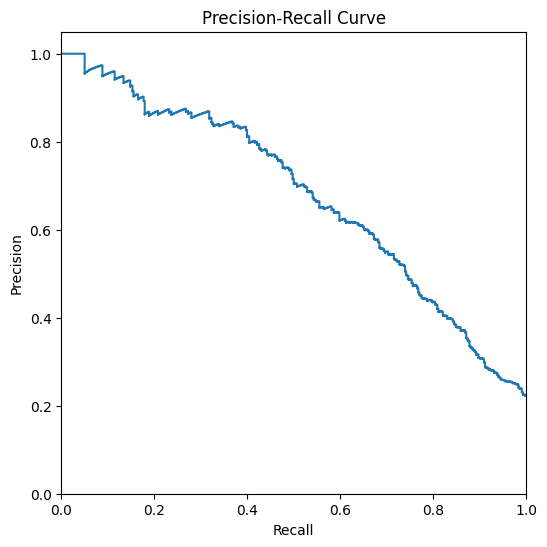

In [205]:
probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


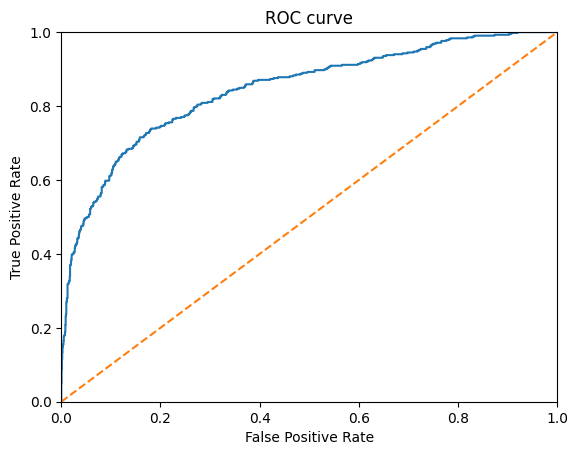

In [206]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


fpr, tpr, thresholds = roc_curve(target_valid,probabilities_one_valid)


plt.figure()
plt.plot(fpr,tpr)
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

- The model has a good ability to distinguish between the two classes based off of the auc roc score of 0.85

***Test Data Trial***

In [207]:
# Predict on the test set
predicted_test = best_model.predict(features_test)

# Calculate F1 score on the test set
f1_test = f1_score(target_test, predicted_test)
print('F1 score on test data:', f1_test)

# Check if it meets the requirement
if f1_test >= 0.59:
    print("The F1 score meets the required threshold.")
else:
    print("The F1 score is below the required threshold.")

# calculate AUC-ROC on the test set
probabilities_test = best_model.predict_proba(features_test)[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_test)
print('AUC-ROC on test data:', auc_roc_test)

F1 score on test data: 0.5909528392685275
The F1 score meets the required threshold.
AUC-ROC on test data: 0.837943787093128


## Conclusion

- During the model training three different models were trialed intially, DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression, to determine which would be best. RandomForestClassifier had the best intial results and was used further.
- Then trialed two ways to balance the data by upscaling and using a balanced weight class, which resulted in upscaling iproving the model more.
- Lastly, finding an auc roc score of 0.84 for the test set shows the model has a good ability to distiguish when a customer will leave the bank.
